In [36]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from IPython.display import Markdown, display

import pypesto
import pypesto.optimize as optimize
import pypesto.profile as profile
import pypesto.visualize as visualize
import pypesto.sample as sample

logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

from tqdm import tqdm
# set a random seed
from PyPESTO.COMP.CPE import CopolymerEquations, cpe_model, create_wrapper, cpe_irreversible_model_nll, amici_irreversible_model, amici_irr_acqf
np.random.seed(1912)


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
amici_irr_acqf().reshape(2, -1)

array([[0.1800276 , 0.35072421, 0.50383597, 0.63787494, 0.75153576,
        0.84384318, 0.91432342],
       [0.07332413, 0.1497586 , 0.23205468, 0.32070835, 0.41615475,
        0.51871894, 0.62855886]])

In [19]:
from PyPESTO.FRP import create_FRP2_v1

create_FRP2_v1.load_amici_from_sbml()

Creating SBML model (FRP2 v1)
Creating species.
Generating parameters.
Creating reactions
Importing AMICI model from SBML
Import model (FRP2_v1) module.


(<amici.amici.ModelPtr; proxy of <Swig Object of type 'std::unique_ptr< amici::Model > *' at 0xffff0efe1ad0> >,
 '/SBML/PyPESTO/FRP/FRP2_v1/sbml_model.xml')

In [32]:
# neither hessian nor gradient objective
objective = pypesto.Objective(
    fun=amici_irreversible_model,
)

In [33]:
dim_full = 2
lb = -3 * np.ones((dim_full, 1))
ub = 3 * np.ones((dim_full, 1))

# for the sake of comparison, we create 20 starts within these bounds
x_guesses = np.random.uniform(-3, 3, (20, dim_full))

problem = pypesto.Problem(
    objective=objective, lb=lb, ub=ub, #x_guesses=x_guesses
)

In [22]:
amici_irr_acqf()

array([0.17462202, 0.34620125, 0.50016787, 0.63501965, 0.7494252 ,
       0.8423964 , 0.91344341, 0.07512599, 0.15126625, 0.23327738,
       0.32166012, 0.41685827, 0.5192012 , 0.6288522 ])

In [23]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)
for j in tqdm(range(0, x.shape[0])):
    for k in tqdm(range(0, x.shape[1])):
        z[j, k] = objective([x[j, k], y[j, k]], (0,))



100%|███████████████████████████████████████████| 60/60 [01:16<00:00,  1.27s/it]


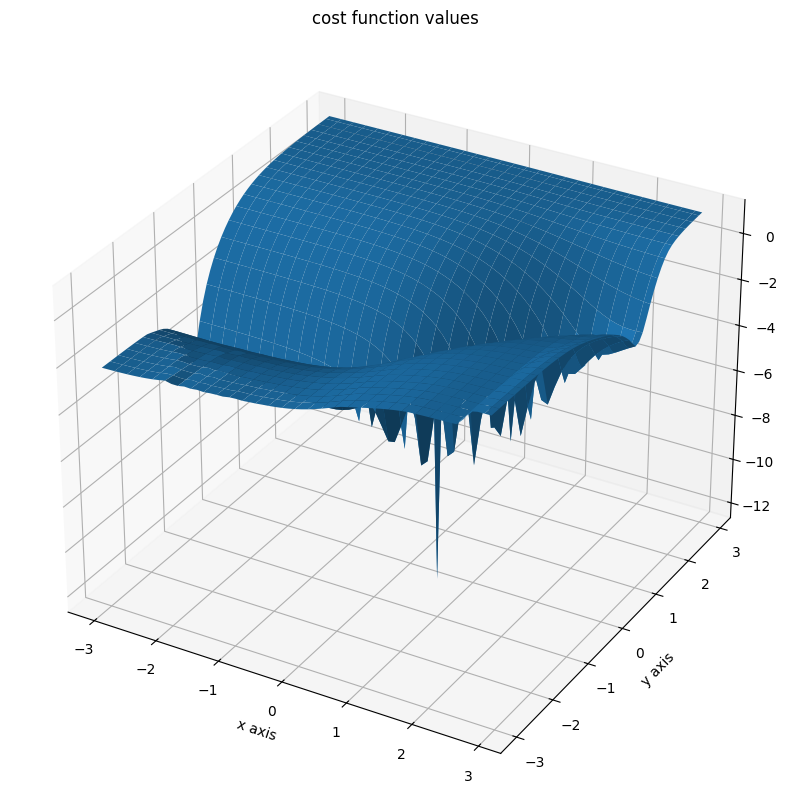

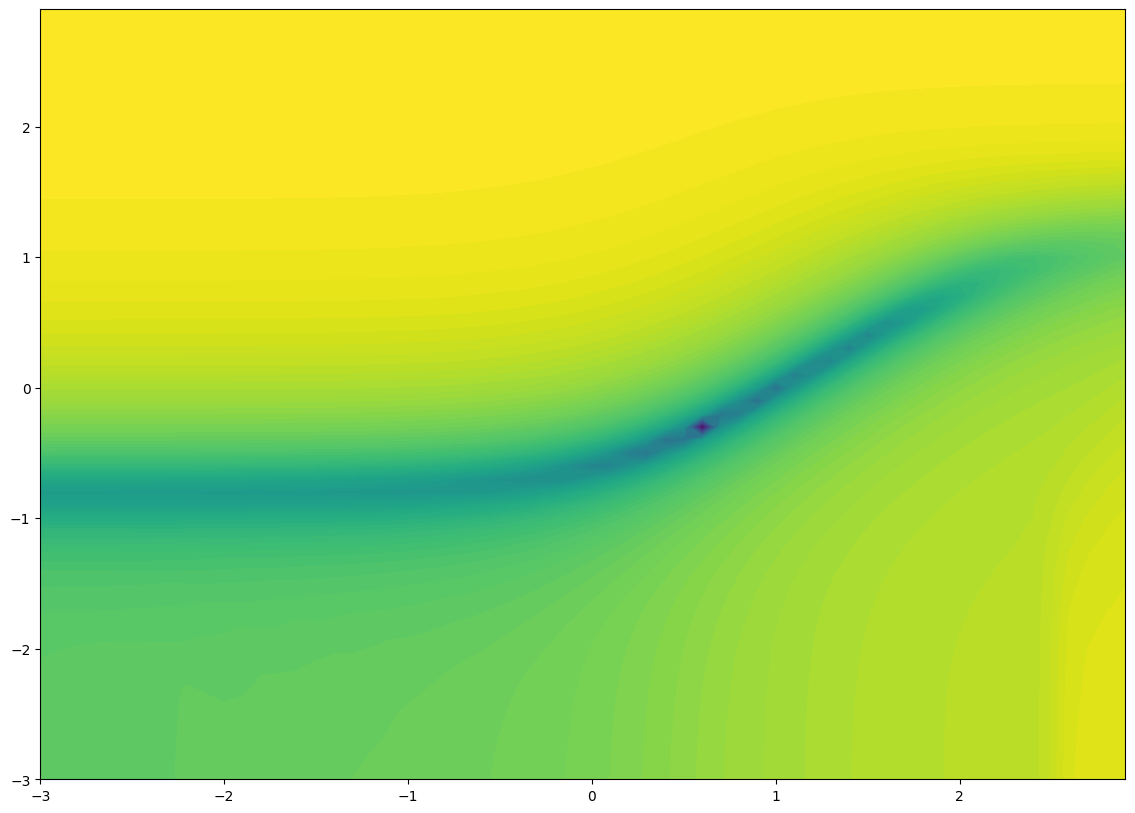

In [25]:

        
fig = plt.figure()
fig.set_size_inches(*(14, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(X=x, Y=y, Z=z)
plt.xlabel("x axis")
plt.ylabel("y axis")
ax.set_title("cost function values")

fig = plt.figure()
fig.set_size_inches(*(14, 10))
ax = plt.axes()
ax.contourf(x, y, z, 100)
# ax.contourf(x, y, z, 100, norm="log")
# ax.plot(np.log10(4), np.log10(0.5), 'ro')

In [30]:
# optimizer
optimizer = optimize.ScipyOptimizer()
# optimizer = optimize.PyswarmOptimizer()
# engine
# In this notebook, it is faster to use a single core engine, due to the
# overhead of multiprocessing. But in general with more expensive problems
# it is recommended to use the MultiProcessEngine.
engine = pypesto.engine.MultiProcessEngine()
# starts
n_starts = 20

# run optimization of problem 1
result1 = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=n_starts, engine=engine
)

Engine will use up to 8 processes (= CPU count).
  0%|                                                    | 0/20 [00:00<?, ?it/s]

Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08


  5%|██▏                                        | 1/20 [02:57<56:12, 177.52s/it]

Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08


 10%|████▍                                       | 2/20 [02:57<21:59, 73.31s/it]

Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08


 25%|███████████                                 | 5/20 [02:58<05:16, 21.07s/it]

Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08


 45%|███████████████████▊                        | 9/20 [05:38<05:51, 31.94s/it]

Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best position change less than 1e-08


 50%|█████████████████████▌                     | 10/20 [05:38<04:25, 26.55s/it]

Stopping search: Swarm best position change less than 1e-08


 65%|███████████████████████████▉               | 13/20 [05:39<01:47, 15.35s/it]

Stopping search: Swarm best position change less than 1e-08


 75%|████████████████████████████████▎          | 15/20 [05:39<00:54, 10.98s/it]

Stopping search: Swarm best position change less than 1e-08


 80%|██████████████████████████████████▍        | 16/20 [05:40<00:36,  9.23s/it]

Stopping search: Swarm best position change less than 1e-08


 85%|████████████████████████████████████▌      | 17/20 [07:26<01:24, 28.14s/it]

Stopping search: Swarm best position change less than 1e-08


 90%|██████████████████████████████████████▋    | 18/20 [07:26<00:44, 22.07s/it]

Stopping search: Swarm best position change less than 1e-08


 95%|████████████████████████████████████████▊  | 19/20 [07:26<00:16, 16.90s/it]

Stopping search: Swarm best position change less than 1e-08


100%|███████████████████████████████████████████| 20/20 [07:26<00:00, 22.34s/it]


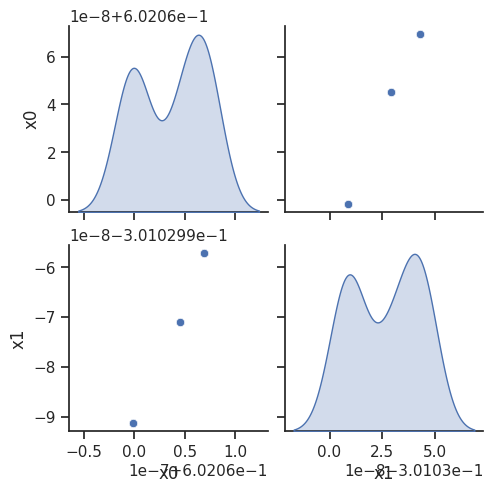

In [31]:
ax = visualize.optimization_scatter(result=result1)

In [ ]:
import pypesto.profile as profile

profile_options = profile.ProfileOptions(
    min_step_size=0.0005,
    delta_ratio_max=0.05,
    default_step_size=0.005,
    ratio_min=0.01,
)

result1 = profile.parameter_profile(
    problem=problem,
    result=result1,
    optimizer=optimizer,
    # profile_index=np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0]),
    # result_index=0,
    profile_options=profile_options,
    filename=None,
)


# specify the parameters, for which profiles should be computed
ax = visualize.profiles(result1)



In [ ]:
import pypesto.sample as sample

sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), n_chains=3
)

result = sample.sample(
    problem, n_samples=10000, sampler=sampler, result=result1, filename=None
)

In [ ]:
ax = visualize.sampling_scatter(result, size=[13, 6])

In [ ]:
visualize.profile_cis(result)

In [ ]:
np.log10([3.0, 0.5])

In [ ]:
visualize.waterfall(
    [result1, result2, result3, result4],
    legends=["Problem 1", "Problem 2", "Problem 3", "Problem 4"],
)

In [ ]:
ax = visualize.parameters(
    result,
)
ax.set_title("Estimated parameters problem 1")
ax.legend()
# ax2 = visualize.parameters(
#     [result4, result1, result2, result3],
#     legends=["Problem 4", "Problem 1", "Problem 2", "Problem 3"],
# )
# ax2.set_title("Estimated parameters all problems")

# ax2 = visualize.parameters(
#     [result2, result3],
#     legends=["Problem 2", "Problem 3"],
# )
# ax2.set_title("Estimated parameters all problems")

In [93]:
# we create references for each "best point":
ref = {
    "x": result.optimize_result.x[0],
    "fval": result.optimize_result.fval[0],
    "color": [0.2, 0.4, 1.0, 1.0],
    "legend": "First optimum problem 1",
}
ref = visualize.create_references(ref)[0]
# we create references for each "best point":
# ref2 = {
#     "x": result1.optimize_result.x[-1],
#     "fval": result1.optimize_result.fval[-1],
#     "color": [0.4, 1.0, 0.2, 1.0],
#     "legend": "Second optimum problem 1",
# }
# ref2 = visualize.create_references(ref2)[0]
# # we create references for each "best point":
# ref4 = {
#     "x": result4.optimize_result.x[0],
#     "fval": result4.optimize_result.fval[0],
#     "color": [0.2, 0.4, 1.0, 1.0],
#     "legend": "First optimum problem 4",
# }
# ref4 = visualize.create_references(ref4)[0];

In [ ]:
# compute profiles
profile_options = profile.ProfileOptions(whole_path=True)

result = profile.parameter_profile(
    problem=problem,
    result=result,
    optimizer=optimizer,
    # profile_index=np.array([0, 1, 3]  ),
    result_index=0,
    profile_options=profile_options,
    filename=None,
)

# compute profiles from second optimum
# result1 = profile.parameter_profile(
#     problem=problem1,
#     result=result1,
#     optimizer=optimizer,
#     profile_index=np.array([0, 1, 3]),
#     result_index=-1,
#     profile_options=profile_options,
#     filename=None,
# )
# result4 = profile.parameter_profile(
#     problem=problem4,
#     result=result4,
#     optimizer=optimizer,
#     profile_index=np.array([0, 1, 3]),
#     result_index=0,
#     profile_options=profile_options,
#     filename=None,
# )

In [ ]:
# specify the parameters, for which profiles should be computed
visualize.profiles(
    result,
    # profile_indices=[0, 1, 3],
    reference=[ref],
    # profile_list_ids=[0, 1],
)

In [ ]:
# ax = visualize.sampling_parameter_cis(result1, alpha=[0.9, 0.95, 0.99], size=(12, 5))

sample.calculate_ci_mcmc_sample(result, ci_level=0.95, exclude_burn_in=True)

In [ ]:
visualize.profiles(
    result4,
    profile_indices=[0, 1, 3],
    reference=[ref4],
)

In [ ]:
result1 = profile.approximate_parameter_profile(
    problem=problem1,
    result=result1,
    profile_index=np.array([0, 1, 3, 5]),
    result_index=0,
    n_steps=1000,
)



visualize.profile_cis(
    result1, confidence_level=0.95, profile_list=2, show_bounds=True
)

